# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing Important Libraries

In [52]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from collections import Counter

pd.set_option('max_columns',None)

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from IPython.display import Image
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
# Dropping Loan_ID as its of no use
df=df.drop('Loan_ID', axis=1)

In [55]:
# Shape of the dataset
df.shape

(614, 12)

The dataset has 614 columns and now after dropping 12 columns.

In [56]:
# Data type of the dataset
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Gender,Married,Dependents,Education,Self_Employed,Property_Area and Loan_Status are Categorical columns

CoapplicantIncome,CoapplicantIncome,Loan_Amount_Term and Credit_History are of float data type

ApplicantIncome is of integer data type

In [57]:
# Checking null values in the dataset
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender has 13 null values, Married has 3 , Dependents has 15, Self_Employed has 32 , LoanAmount has 22, Loan_Amount_Term has 14 and Credit_History
has 50 null values present. Need to remove them

<AxesSubplot:>

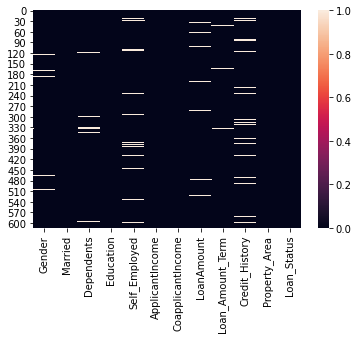

In [58]:
# Checking null values in the dataset by heatmap
sns.heatmap(df.isnull())

By heatmap also, we see that except (Education,ApplicantIncome,CoapplicantIncome,Propert_Area and Loan_Status) these columns,
all columns contains null values.

# Filling missing values

In [59]:
# fill the missing values for numerical columns - median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# fill the missing values for categorical columns - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [60]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

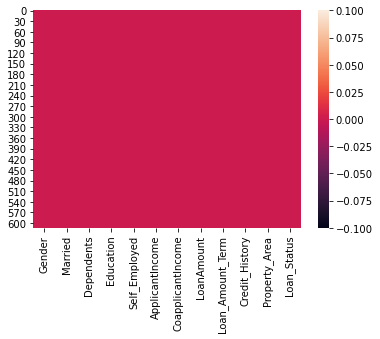

In [61]:
# Checking null values in the dataset by heatmap
sns.heatmap(df.isnull())

 Now null values are there
If there were any, you would've noticed in figure represented by different colour shade.

In [62]:
# Label Encoding
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

Now , our target variable Loan_Status has been converted to 0 and 1

In [63]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# Columns Value Counts

In [163]:
# Dependent columns

In [64]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

As we can see there are 4 category of dependents columns where one category is 3+ , which is not acceptable, so need to replace this

In [65]:
# Replacing the value of 3+ to 4
df=df.replace(to_replace='3+' , value =4)

In [66]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

now , it has been replaced

# EDA

In [67]:
#all the data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ': ' +str(df[column].unique()))
        print(df[column].value_counts())
        print('\n')

Gender: ['Male' 'Female']
Male      502
Female    112
Name: Gender, dtype: int64


Married: ['No' 'Yes']
Yes    401
No     213
Name: Married, dtype: int64


Dependents: ['0' '1' '2' 4]
0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64


Education: ['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed: ['No' 'Yes']
No     532
Yes     82
Name: Self_Employed, dtype: int64


Property_Area: ['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64




1> Gender has 2 category (Male count : 502 , female count : 112)

2> Self_Employed: ['No' 'Yes'] (No : 532 , Yes : 82)

3> Property_Area: ['Urban' 'Rural' 'Semiurban'] (Semi-Urban : 233 , Urban : 202, Rural : 179)

4> Education: ['Graduate' 'Not Graduate'] (Graduate : 480 , Not-Graduate : 134)

5> Dependents: ['0' '1' '2' '4'] (0 : 360 ,1: 102, 2: 101 , 4: 51)

6> Married: ['No' 'Yes'] (Yes: 401, No :213)

# Summary Statistics

In [68]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


All the columns have 614 values

Mean is greater than median in ApplicantIncome , CoapplicantIncome and LoanAmount . So, there may be outliers

std is also high in ApplicantIncome, CoapplicantIncome . So, there will be skewness

Except Credit_History , there is huge difference between 75% and ,max value , these all contains outliers 

In [69]:
# To Check correlation
dfcor=df.corr()
dfcor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.033214,-0.022549,0.540556,1.000000


<AxesSubplot:>

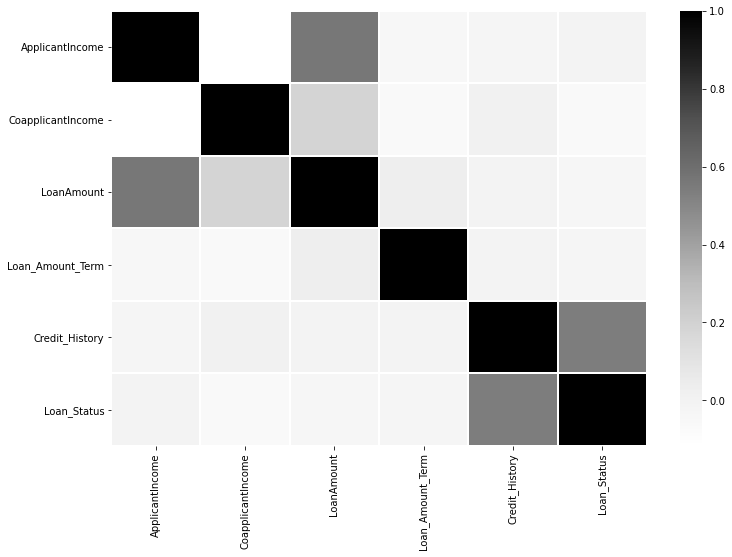

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Greys',linewidths=1)

<AxesSubplot:>

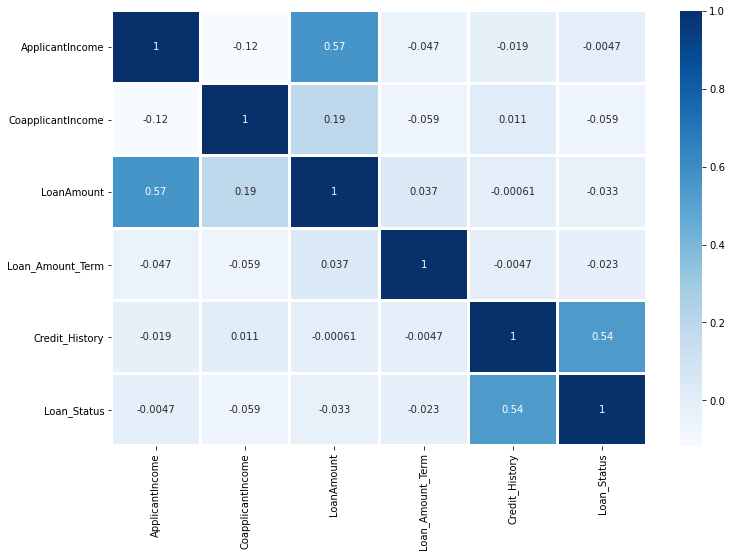

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Blues',annot=True,linewidths=2)

Loan_status has very high and good correlation with Credit_history

Except Credit_History , all columns has negative correlation with target variable Loan_Status , but they all are in the range near to 0

ApplicantIncome has positive correlation with LoanAmount 

In [72]:
# count the no of values in each column
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Visualizations

# For Categorical columns

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

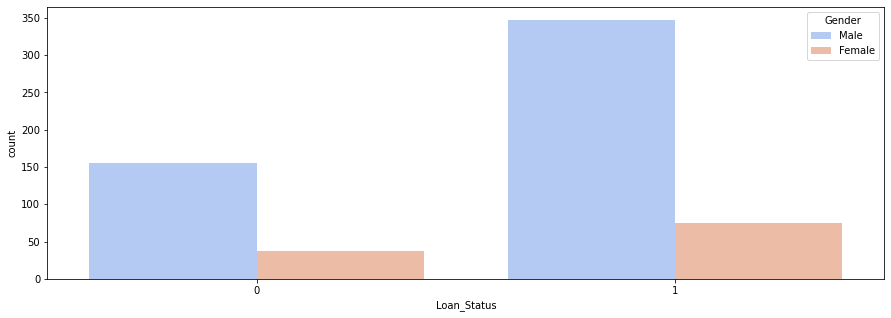

In [73]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Gender', data=df)

Around 340 males and 70 females have a Loan_status of yes , rest of them have status no

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

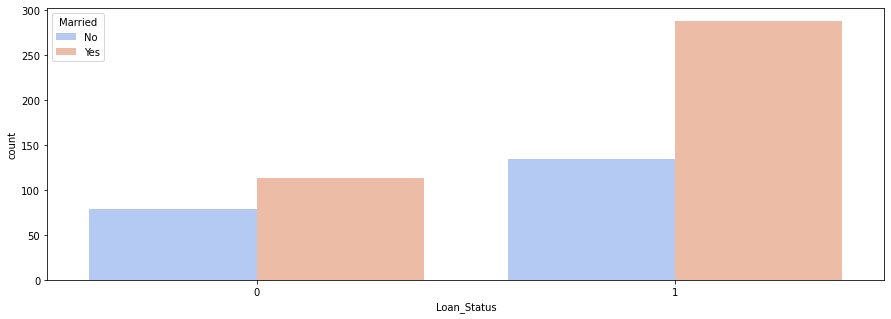

In [74]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Married', data=df)

285 persons are married people and 120 unmarried people who have status of Yes, rest have status of no

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

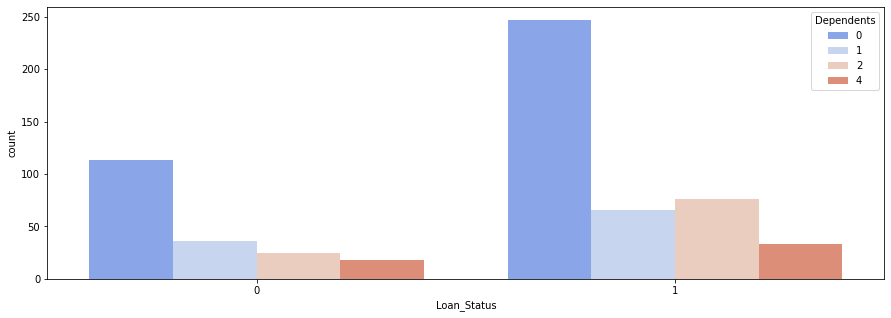

In [75]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Dependents', data=df)

0 Dependents category has highest no of people that have loan_status of yes and no both

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

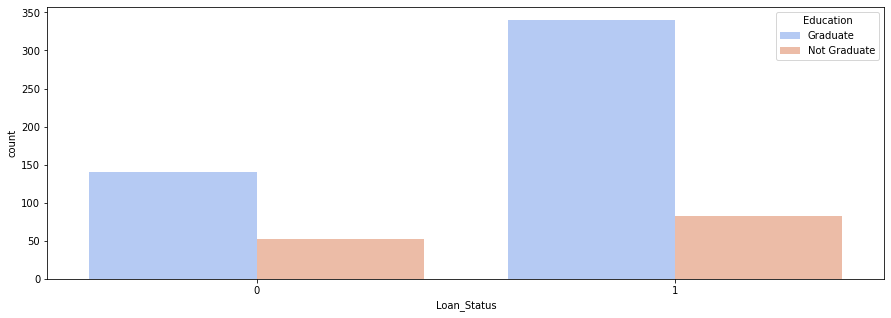

In [76]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Education', data=df)

340 people who are graduate are eligible to approved a loan status

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

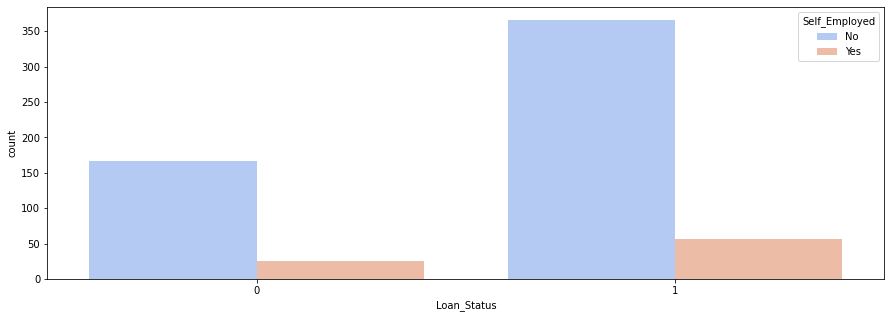

In [77]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Self_Employed', data=df)

50 people only who are self-employed and >350 people who are not self-employed have a loan_status yes

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

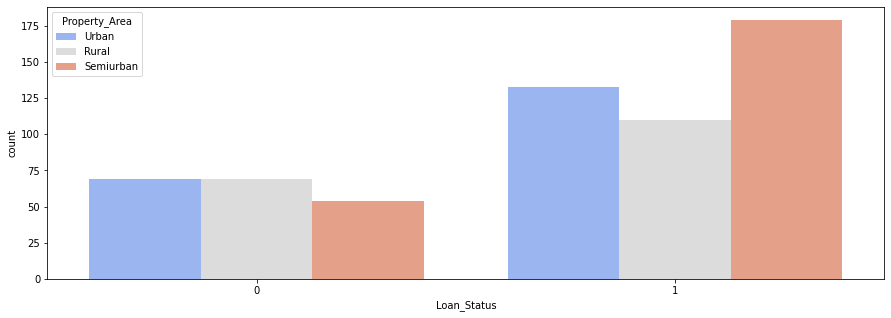

In [78]:
plt.figure(figsize= (15,5))
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Property_Area', data=df)

The people who has property in Semi-Urban area are highest in terms of getting loan approval

# For Numerical columns

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

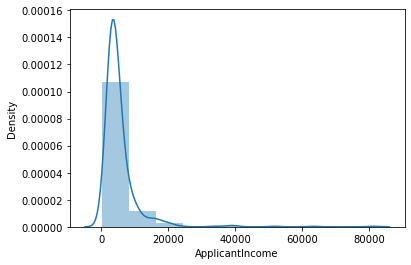

In [79]:
sns.distplot(df['ApplicantIncome'],bins=10)

Between income 4000-6000 , maximum people resides 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

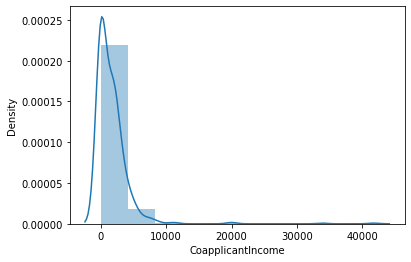

In [80]:
sns.distplot(df["CoapplicantIncome"],bins=10)

Maximum people are there, who have CoapplicantIncome in range 0-5000  , and little skewness is also there

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

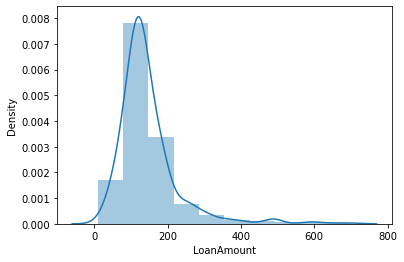

In [81]:
sns.distplot(df["LoanAmount"],bins=10)

The max people who have loanamount in range  100-200 are there

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

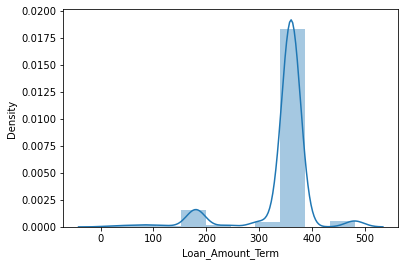

In [82]:
sns.distplot(df['Loan_Amount_Term'],bins=10)

Density is max between 350-400 loan_amount_term

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

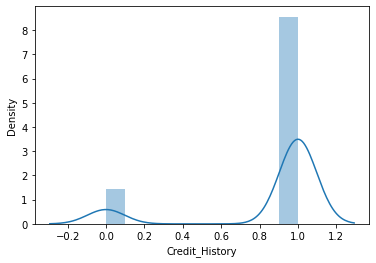

In [83]:
sns.distplot(df['Credit_History'],bins=10)

Those who have Credit_history of 1 , are maximum in numbers

# Box-Plot

ApplicantIncome         AxesSubplot(0.125,0.657941;0.227941x0.222059)
CoapplicantIncome    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
LoanAmount           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Loan_Amount_Term        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Credit_History       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Loan_Status          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

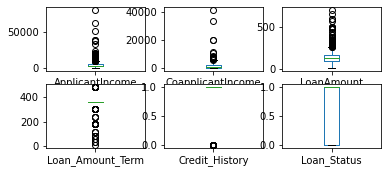

In [84]:
plt.figsize=(30,30)
df.plot(kind='box' ,subplots=True  ,layout=(3,3))

All the columns contains Outliers

# Strip-Plot

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

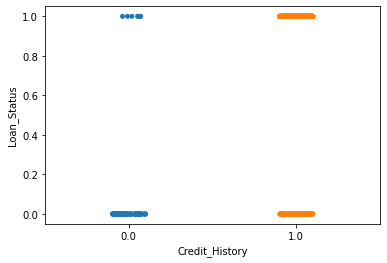

In [85]:
sns.stripplot(x='Credit_History', y='Loan_Status', data=df)

weplotted bothy the variable to see thre correlationship beyween two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high 

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

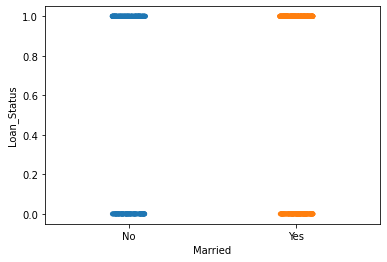

In [86]:
sns.stripplot(x='Married', y='Loan_Status', data=df)

we plotted both the variable to see thre correlationship between two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high 

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

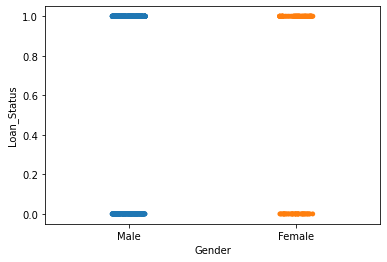

In [87]:
sns.stripplot(x='Gender', y='Loan_Status', data=df)

weplotted both the variable to see thre correlationship beyween two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high 

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

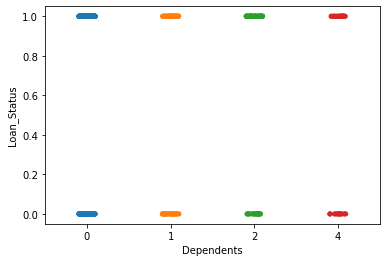

In [88]:
sns.stripplot(x='Dependents', y='Loan_Status', data=df)

weplotted bothy the variable to see thre correlationship beyween two , those two varibales are categorial so we checked through stripplot,but correlationship is not that much high although positively correlated

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

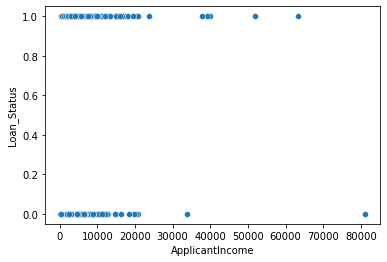

In [89]:
sns.scatterplot(x='ApplicantIncome', y='Loan_Status', data=df)

The maximum data resides whose applicantincome in 10k-20k

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

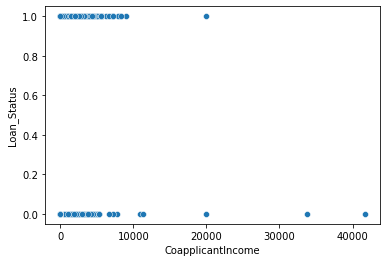

In [90]:
sns.scatterplot(x='CoapplicantIncome', y='Loan_Status', data=df)

The maximum data resides whose CoapplicantIncome in 0-10k

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

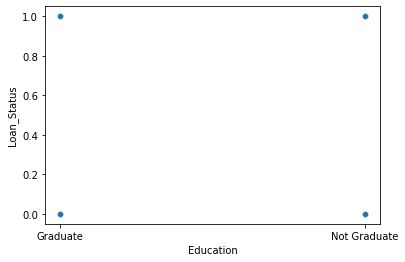

In [91]:
sns.scatterplot(x='Education', y='Loan_Status', data=df)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

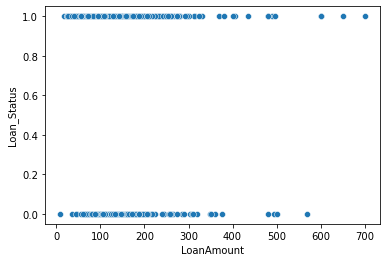

In [92]:
sns.scatterplot(x='LoanAmount', y='Loan_Status', data=df)

The maximum peoples resides whose LoanAmount in 50-350 an some persons are also there in the range 500-6--

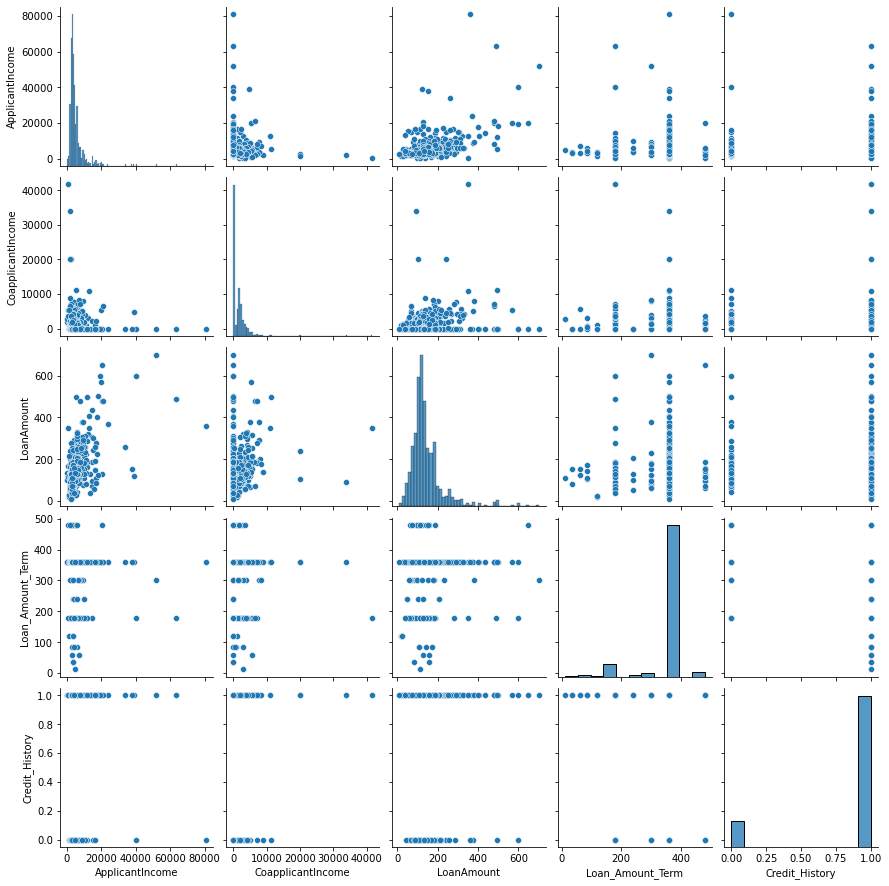

In [164]:
sns.pairplot(df)

# Data Preprocessing

# LABEL-ENCODING

In [93]:
from sklearn.preprocessing  import LabelEncoder

le=LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])         
df['Self_Employed']=le.fit_transform(df['Self_Employed']) 
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Married'])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


All the columns are converted to numerical columns

In [94]:
df.shape

(614, 12)

In [95]:
# Making dfcat dataframe and putting all categorical columns into that

In [96]:
dfcat=df[['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]]

In [97]:
# Dropping all 7 columns cat columns from original dataset df

In [98]:
df=df.drop(['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"],axis=1)

In [99]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


df has only 5 numerical columns where we need to remove outliers and skewness

In [100]:
df.shape

(614, 5)

# Removing Outliers Using Z-Score

In [101]:
# Converting into absolute data
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.07299082, 0.55448733, 0.21124125, 0.2732313 , 0.41173269],
       [0.13441195, 0.03873155, 0.21124125, 0.2732313 , 0.41173269],
       [0.39374734, 0.55448733, 0.94899647, 0.2732313 , 0.41173269],
       ...,
       [0.43717437, 0.47240418, 1.27616847, 0.2732313 , 0.41173269],
       [0.35706382, 0.55448733, 0.49081614, 0.2732313 , 0.41173269],
       [0.13441195, 0.55448733, 0.15174486, 0.2732313 , 2.42876026]])

In [102]:
# Taking threshold =3
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [103]:
# removing all outliers
df_new=df[(z<3).all(axis=1)]

In [104]:
df_new.shape

(577, 5)

we have lost 37 rows i.e around 6 percent data loss is there.

We have successfully removed outliers

# Skewness Removal

In [105]:
# Checking the skewness of the numerical dataframe
df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

In [106]:
# Applying Power transform method

In [107]:
from sklearn.preprocessing import power_transform

In [108]:
df_new['ApplicantIncome'] = power_transform(np.array(df_new['ApplicantIncome']).reshape(-1,1), method='yeo-johnson')

In [109]:
df_new['LoanAmount'] = power_transform(np.array(df_new['LoanAmount']).reshape(-1,1), method='yeo-johnson')
df_new['CoapplicantIncome'] = power_transform(np.array(df_new['CoapplicantIncome']).reshape(-1,1), method='yeo-johnson')
df_new['Loan_Amount_Term'] = power_transform(np.array(df_new['Loan_Amount_Term']).reshape(-1,1), method='yeo-johnson')
df_new['Credit_History'] = power_transform(np.array(df_new['Credit_History']).reshape(-1,1), method='yeo-johnson')

In [110]:
df_new['Credit_History'] = power_transform(np.array(df_new['Credit_History']).reshape(-1,1), method='yeo-johnson')

In [111]:
df_new.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
dtype: float64

All the skewness have been removed

In [112]:
# Now, Adding categorical and cleaned numerical columns into single dataframe df_new

In [113]:
df_new[['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]]=dfcat[['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]]

In [114]:
df_new.shape

(577, 12)

# Seperating the features and label columns

In [115]:
X = df_new.drop(columns=['Loan_Status'], axis=1)
y = df_new['Loan_Status']

# Train_Test_Split

In [116]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Scaling

In [117]:
#As the data points differ a lot in magnitude we'll Scale them using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [118]:
x_train.shape

(403, 11)

In [119]:
y_train.shape

(403,)

# Model Selection

In [120]:
from  sklearn.svm import SVC
from sklearn.ensemble  import AdaBoostClassifier

from  sklearn.metrics import confusion_matrix, classification_report ,accuracy_score

# AdaBoost Classifier

In [121]:
ad=AdaBoostClassifier( n_estimators=50)
ad.fit(x_train, y_train)
adprd=ad.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,adprd))
print(confusion_matrix(y_test, adprd))
print(classification_report(y_test,adprd))

Accuracy score is 0.8390804597701149
[[ 30  21]
 [  7 116]]
              precision    recall  f1-score   support

           0       0.81      0.59      0.68        51
           1       0.85      0.94      0.89       123

    accuracy                           0.84       174
   macro avg       0.83      0.77      0.79       174
weighted avg       0.84      0.84      0.83       174



Got 83.9% accuracy while using AdaBoostClassifier

# SVC

In [122]:
KernelList=['linear'  ,'poly'  ,'rbf']


for i in KernelList:
    sv=SVC(kernel =i)
    sv.fit(x_train,y_train)
    predsvc=sv.predict(x_test)
    print(sv.score(x_train,y_train))
    print("acccuracy score" , accuracy_score(y_test,predsvc))
    print("confusion matrix", confusion_matrix(y_test,predsvc))
    print("clasification report",classification_report(y_test,predsvc))

0.8039702233250621
acccuracy score 0.8505747126436781
confusion matrix [[ 26  25]
 [  1 122]]
clasification report               precision    recall  f1-score   support

           0       0.96      0.51      0.67        51
           1       0.83      0.99      0.90       123

    accuracy                           0.85       174
   macro avg       0.90      0.75      0.79       174
weighted avg       0.87      0.85      0.83       174

0.8362282878411911
acccuracy score 0.8275862068965517
confusion matrix [[ 26  25]
 [  5 118]]
clasification report               precision    recall  f1-score   support

           0       0.84      0.51      0.63        51
           1       0.83      0.96      0.89       123

    accuracy                           0.83       174
   macro avg       0.83      0.73      0.76       174
weighted avg       0.83      0.83      0.81       174

0.8188585607940446
acccuracy score 0.8390804597701149
confusion matrix [[ 27  24]
 [  4 119]]
clasification report  

Got 85% accuracy using SVC

# Logistics Regression

In [123]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("Accuracy is", lr.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(lr, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 85.63218390804597
Cross validation is 79.6604938271605


Got 85.6% accuracy using LogisticRegression

# KNeighborsClassifier

In [124]:
kmn=KNeighborsClassifier(n_neighbors=5)
kmn.fit(x_train, y_train)
kmnpred=kmn.predict(x_test)
print("accuracy score is",accuracy_score(y_test,kmnpred))
print("confusion matrix", confusion_matrix(y_test,kmnpred))
print("classification report",classification_report(y_test,kmnpred))

accuracy score is 0.8275862068965517
confusion matrix [[ 29  22]
 [  8 115]]
classification report               precision    recall  f1-score   support

           0       0.78      0.57      0.66        51
           1       0.84      0.93      0.88       123

    accuracy                           0.83       174
   macro avg       0.81      0.75      0.77       174
weighted avg       0.82      0.83      0.82       174



Got 82.7% accuracy using KNeighborsClassifier

# GaussianNB 

In [125]:
gauss = GaussianNB()
gauss.fit(x_train,y_train)
print("Accuracy is", gauss.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(gauss, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 83.33333333333334
Cross validation is 80.40123456790124


Got 83.33% accuracy using GaussianNB

# Decision Tree Classifier

In [126]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("acccuracy score" , accuracy_score(y_test,preddtc))
print("confusion matrix", confusion_matrix(y_test,preddtc))
print("clasification report",classification_report(y_test,preddtc))  


acccuracy score 0.7298850574712644
confusion matrix [[35 16]
 [31 92]]
clasification report               precision    recall  f1-score   support

           0       0.53      0.69      0.60        51
           1       0.85      0.75      0.80       123

    accuracy                           0.73       174
   macro avg       0.69      0.72      0.70       174
weighted avg       0.76      0.73      0.74       174



Got 73% accuracy using DecisionTreeClassifier

# Random Forest Classifier

In [127]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("accuracy score is",accuracy_score(y_test,predrfc))
print("confusion matrix", confusion_matrix(y_test,predrfc))
print("classification report",classification_report(y_test,predrfc))


accuracy score is 0.8333333333333334
confusion matrix [[ 30  21]
 [  8 115]]
classification report               precision    recall  f1-score   support

           0       0.79      0.59      0.67        51
           1       0.85      0.93      0.89       123

    accuracy                           0.83       174
   macro avg       0.82      0.76      0.78       174
weighted avg       0.83      0.83      0.83       174



Got 83.33% accuracy using RandomForestClassifier

# AUC-ROC CURVE

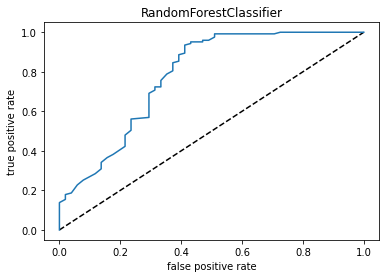

0.7615973218555716


In [128]:
# RandomForestClassifier
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

y_pred_proba= rfc.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='rfr')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('RandomForestClassifier')
plt.show()





auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)


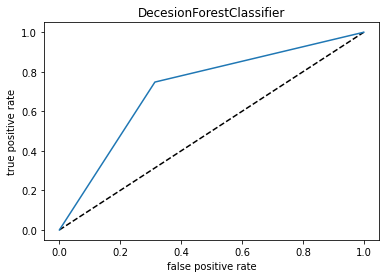

0.7171209947393591


In [129]:
# DTC

from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

y_pred_proba= dtc.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='dtr')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('DecesionForestClassifier')
plt.show()





auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print(auc_score)

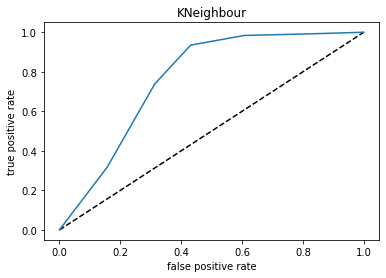

0.7615973218555716


In [130]:
# KNN
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

y_pred_proba= kmn.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='rfr')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('KNeighbour')
plt.show()





auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

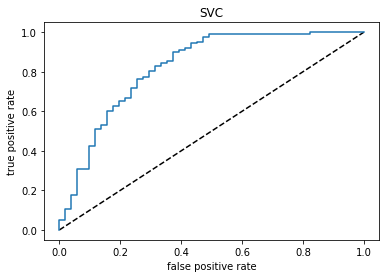

In [131]:
#SVC

from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score
sv=SVC(probability=True)
sv.fit(x_train, y_train)

y_pred_proba= sv.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='rfr')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('SVC')
plt.show()


# Cross-Validation

In [132]:
from sklearn.model_selection  import cross_val_score

In [133]:
print(cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean())

0.7816975308641975


In [134]:
print(cross_val_score(dtc,X,y,cv=5).mean())

0.7245877061469266


In [135]:
print(cross_val_score(SVC(),X,y,cv=5).mean())

0.8146176911544227


In [136]:
print(cross_val_score(kmn,X,y,cv=5).mean())

0.8042578710644678


In [137]:
score = cross_val_score(lr, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 79.6604938271605


In [138]:
score = cross_val_score(lr, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 81.80809595202398


# Hyperparameter Tuning

# 1>>Hyperparameter tuning of AdaBoostClassifier

In [139]:
# define the hyperparameter we want to tune
param_grid = {'n_estimators' : [100,200],
             'learning_rate' : [0.001,0.01,0.1,0.2,0.5]}

In [140]:
gs_ab=GridSearchCV(AdaBoostClassifier(),param_grid=param_grid)

In [141]:
gs_ab.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 200]})

In [142]:
gs_ab.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [143]:
Finalmodel=AdaBoostClassifier(learning_rate=0.001, n_estimators = 100)
Finalmodel.fit(x_train, y_train)

pred=Finalmodel.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)

85.0574712643678


# 2>>Hyperparameter tuning of RandomforestClassifier

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
parameter1= {'n_estimators':[2,4,6,8],
           'criterion':['gini', 'entropy']  ,'max_depth':np.arange(2,20), 'max_leaf_nodes':[1,2,3,4,5,6]}

In [146]:
GCV=GridSearchCV(RandomForestClassifier(),parameter1,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [2, 4, 6, 8]})

In [147]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 4,
 'n_estimators': 6}

In [165]:
Finalmodel=RandomForestClassifier(criterion= 'entropy', max_depth= 7, n_estimators = 6, max_leaf_nodes= 4)
Finalmodel.fit(x_train, y_train)

pred=Finalmodel.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)

85.0574712643678


# 3>> Hyperparameter tuning of Logistics Regression

In [166]:
#Tuning three hyperparameters now, by passing the diffrent values for both parameters

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [167]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [168]:
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [169]:
#Lets see the best parameter as per the our grid search
best_clf.best_estimator_

LogisticRegression(C=0.0001, solver='liblinear')

In [170]:
lr = LogisticRegression(C=0.0001, solver='liblinear')
lr.fit(x_train, y_train)
print("Accuracy is", lr.score(x_test, y_test)*100)

Accuracy is 84.48275862068965


# 4>> Hyperparameter tuning of DecisionTreeClassifier

In [171]:
parameter2={'criterion':['gini', 'entropy']  ,'max_depth':np.arange(2,20), 'max_leaf_nodes':[1,2,3,4,5,6],'splitter':['best','random']}

In [172]:
GCV=GridSearchCV(dtc,parameter2,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [173]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 6,
 'splitter': 'random'}

In [176]:
Finalmodel1=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 6, splitter='random')
Finalmodel1.fit(x_train, y_train)

pred=Finalmodel1.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)

85.0574712643678


# Conclusion

We conclude that Our best model is RandomforestClassifier with accuracy 85.05 %

# Saving the model

In [177]:
import joblib
joblib.dump(Finalmodel,"Bestmodel for Loan_Application_prediction.pkl")

['Bestmodel for Loan_Application_prediction.pkl']